# 1. Introduction

This section outlines the goals and context of the data understanding phase.

## Library Imports

In this section we import the necessary libraries for analysis:
- `pandas`: for data manipulation
- `numpy`: for numerical computations
- `matplotlib` and `seaborn`: for data visualization
- `ast`: for safe parsing of string lists
- `pathlib`: for file path management

Import libraries and configure the environment.

This cell imports commonly used packages (pandas, numpy, matplotlib, seaborn), sets warning filters, and updates sys.path so local modules in the parent directory (e.g., `utils.plotting`) can be imported.

In [58]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
from pathlib import Path

# Add parent directory to path for importing local modules
current_dir = Path.cwd()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))

from utils.plotting import *

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

Load the datasets from CSV files into pandas DataFrames.

This cell reads the original `artists` and `tracks` CSV files into `artists` and `tracks` variables for further inspection and processing.

# 2. Data Collection

Load the datasets and perform an initial inspection of their structure, dimensions, and datatypes.

In [31]:
# load datasets from CSV to pandas df
# artsists is delimited using ; so use sep=','
artists = pd.read_csv("../original_datasets/artists.csv", sep=';')
tracks = pd.read_csv("../original_datasets/tracks.csv", sep=',')

Show the shape (number of rows and columns) of the loaded datasets to quickly verify their dimensions.

In [32]:
## Datasets shape
artists_shape = artists.shape
tracks_shape = tracks.shape
print(f"Artists rows: {artists_shape[0]}, columns: {artists_shape[1]}")
print(f"Tracks  rows: {tracks_shape[0]}, columns: {tracks_shape[1]}")

Artists rows: 104, columns: 14
Tracks  rows: 11166, columns: 45


Display a quick preview (head) of the `artists` DataFrame to inspect columns and sample rows.

In [33]:
## Let's see some row values by using df.head()
artists.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN


Display a quick preview (head) of the `tracks` DataFrame to inspect columns and sample rows.

In [34]:
tracks.head()

,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False
3,TR480968,ART04205421,Rosa Chemical,CEO by Rosa Chemical (Ft. Taxi B),CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,39890.0,...,single,1.0,2.0,169000.0,True,47.0,https://i.scdn.co/image/ab67616d0000b27367c03d...,ALB730959,Designer sui vestiti penso di essere un outlet...,False
4,TR585039,ART04205421,Rosa Chemical,LONDRA by Rosa Chemical (Ft. Rkomi),LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,35432.0,...,album,1.0,8.0,194779.0,True,41.0,https://i.scdn.co/image/ab67616d0000b273fcdb60...,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",False


Inspect data types in the `artists` DataFrame (dtypes, non-null counts) to identify columns that need casting or cleaning.

In [35]:
###################
## Data types, let's convert data types before doing duplicate analysis so that values in rows are in the correct datat type for comprare

# 'DType' is the effective type used in the dataframe, we can see that many columns need casting to the expected data type
# let's start with artists
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        104 non-null    object 
 3   birth_date    73 non-null     object 
 4   birth_place   72 non-null     object 
 5   nationality   71 non-null     object 
 6   description   86 non-null     object 
 7   active_start  50 non-null     object 
 8   active_end    0 non-null      float64
 9   province      70 non-null     object 
 10  region        68 non-null     object 
 11  country       70 non-null     object 
 12  latitude      72 non-null     float64
 13  longitude     72 non-null     float64
dtypes: float64(3), object(11)
memory usage: 11.5+ KB


Prepare to convert column types and inspect the DataFrame schema—this helps identify columns that need casting and cleaning before downstream analysis.

In [36]:
###################
# show datasets type information
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null  object 
 15  month              

Display DataFrame info for `tracks` to inspect dtypes and non-null counts before performing conversions.

# 4. Data Quality Verification

Assess data quality by checking for missing values, duplicates, outliers, and inconsistent records.

,NaN Values %,NaN Values,Non-NaN Values %
active_end,100.000000,104,0.000000
active_start,51.923077,54,48.076923
region,34.615385,36,65.384615
province,32.692308,34,67.307692
country,32.692308,34,67.307692
nationality,31.730769,33,68.269231
birth_place,30.769231,32,69.230769
latitude,30.769231,32,69.230769
longitude,30.769231,32,69.230769
birth_date,29.807692,31,70.192308


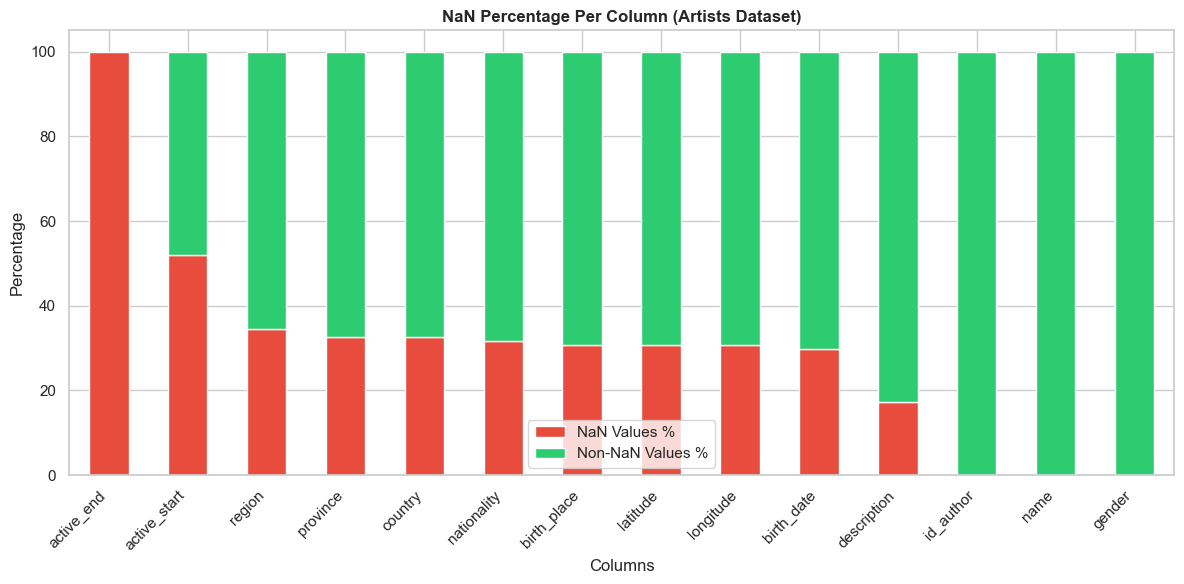

In [37]:
## Artists
# Check how many NaNs are present and plot the number of NaN per each column
# from the distribution we can see that no active end date is present, and about half active start
plot_nans_stacked(artists, 'NaN Percentage Per Column (Artists Dataset)')

Visualize missing-value percentages for the `artists` dataset to identify columns with many NaNs and prioritize cleaning.

,NaN Values %,NaN Values,Non-NaN Values %
featured_artists,68.502597,7649,31.497403
stats_pageviews,58.427369,6524,41.572631
album,13.559018,1514,86.440982
day,11.848469,1323,88.151531
month,10.720043,1197,89.279957
year,3.582303,400,96.417697
language,0.940355,105,99.059645
duration_ms,0.698549,78,99.301451
album_release_date,0.698549,78,99.301451
disc_number,0.698549,78,99.301451


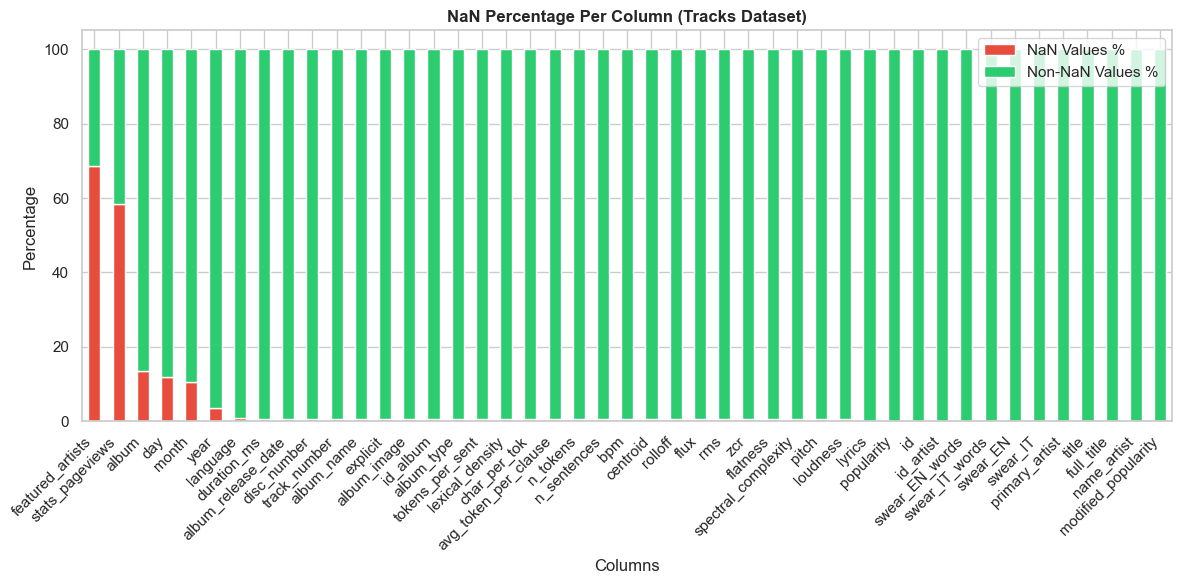

In [38]:
## Tracks
# Check how many NaNs are present and plot the number of NaN per each column
plot_nans_stacked(tracks, 'NaN Percentage Per Column (Tracks Dataset)')

Visualize missing-value percentages for the `tracks` dataset to identify problematic columns and gauge data completeness.

Analysing outliers

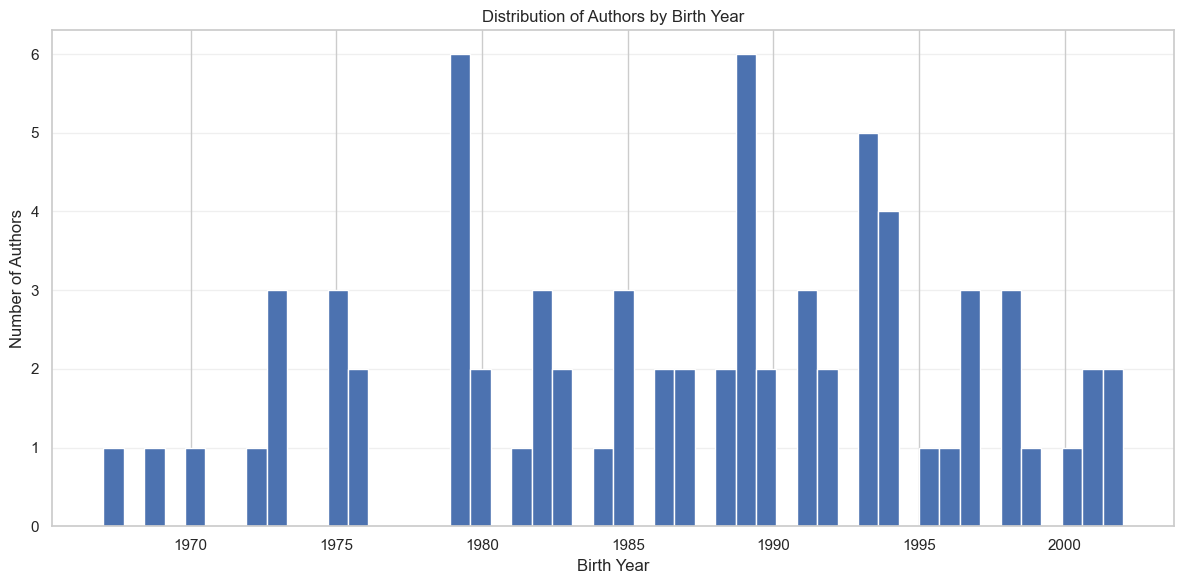

In [39]:
# birth year
artists['birth_year'] = pd.to_datetime(artists['birth_date'], errors='coerce').dt.year
plot_histogram(artists, 'birth_year', 'Birth Year', 'Number of Authors', 'Distribution of Authors by Birth Year', nbins=50)

Calculate birth years from `birth_date` and plot their distribution to understand the age distribution of authors.

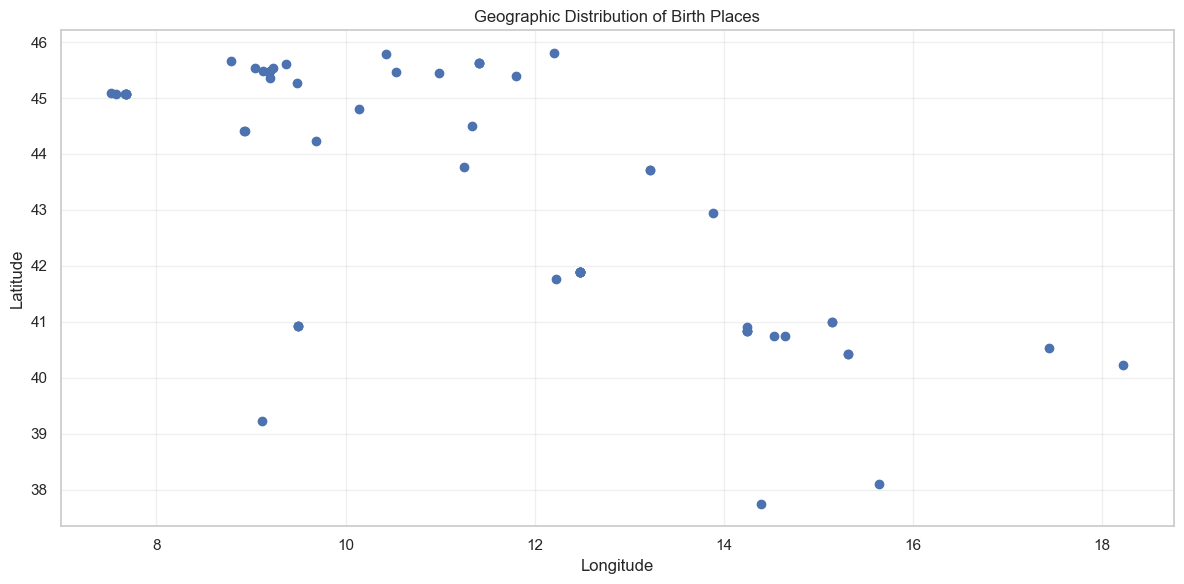

In [40]:
# We can see the map which resembles italy, partially
plot_scatter(artists, 'longitude', 'latitude', 'Longitude', 'Latitude', 'Geographic Distribution of Birth Places')

Plot geographic distribution of artists' birth places using latitude and longitude to visualize spatial patterns.

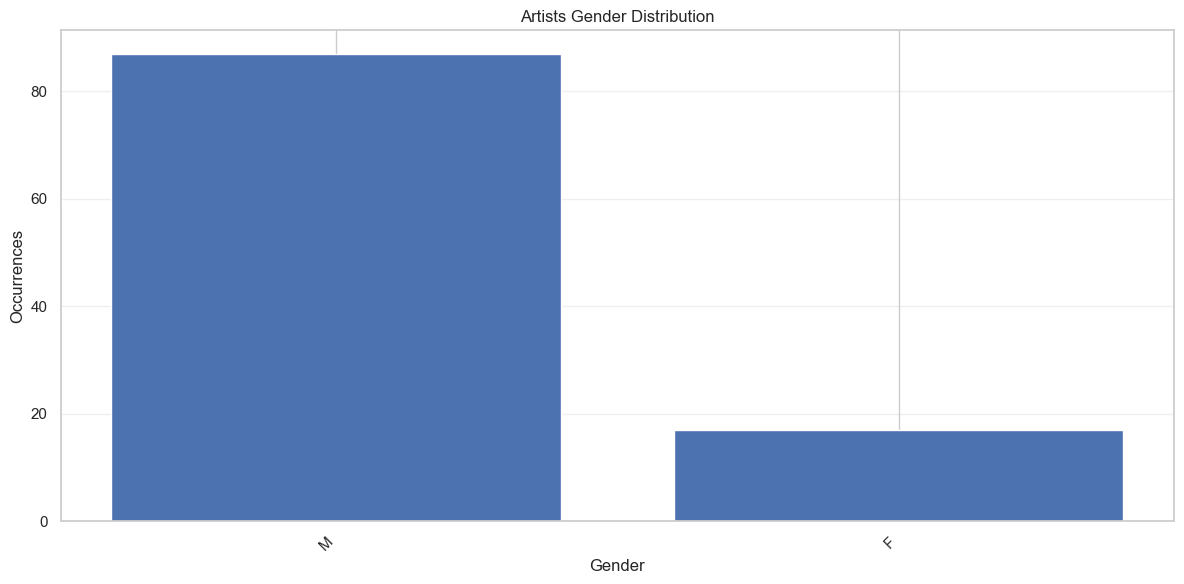

In [41]:
# gender distribution
plot_bar_chart_distribution(artists, 'gender', 'Gender', 'Occurrences', 'Artists Gender Distribution')

Plot the gender distribution for artists to see the composition across genders.

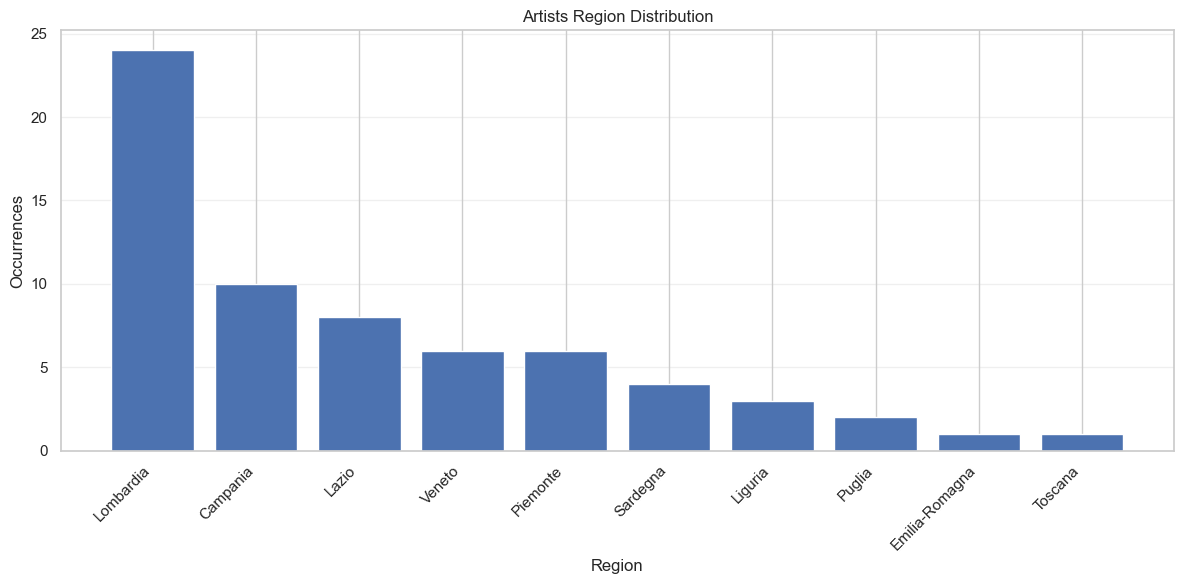

In [42]:
# region distribution
plot_bar_chart_distribution(artists, 'region', 'Region', 'Occurrences', 'Artists Region Distribution')

Plot region distribution of artists to identify geographic concentrations by region.

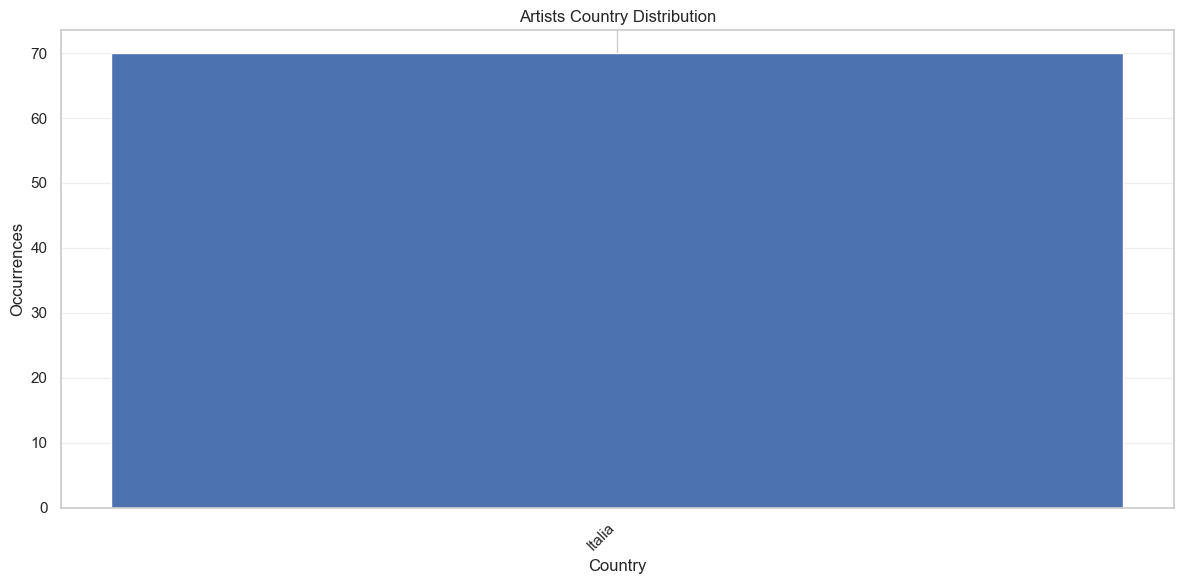

In [19]:
# countries distribution
plot_bar_chart_distribution(artists, 'country', 'Country', 'Occurrences', 'Artists Country Distribution')

Plot country distribution to see which countries most artists come from.

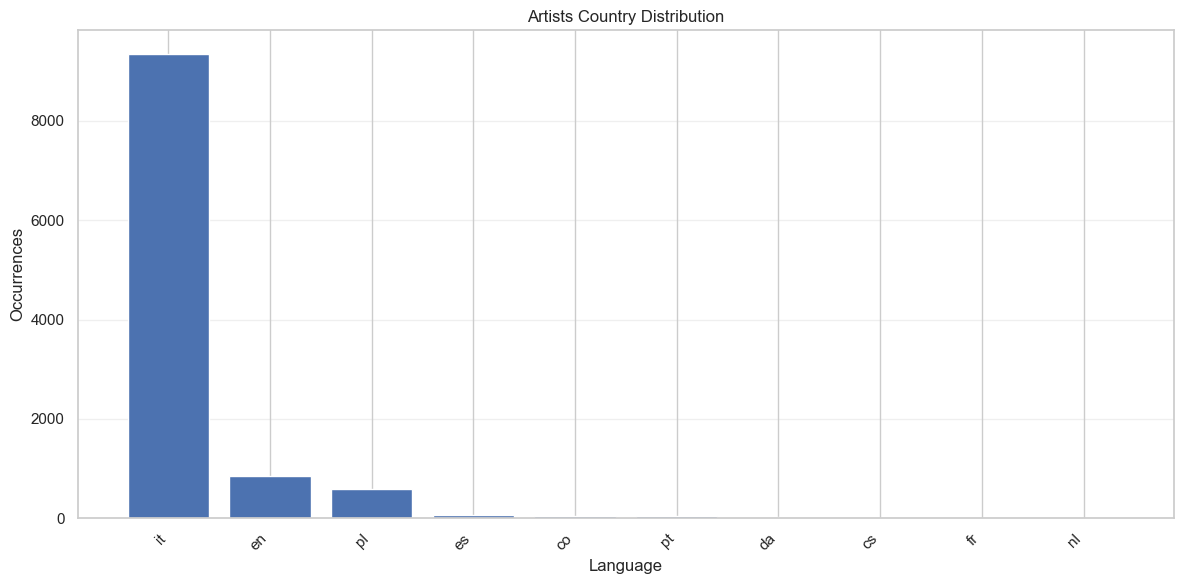

In [43]:
############
# Most used language
plot_bar_chart_distribution(tracks, 'language', 'Language', 'Occurrences', 'Artists Country Distribution')

Plot the distribution of track languages to understand language usage across the dataset.

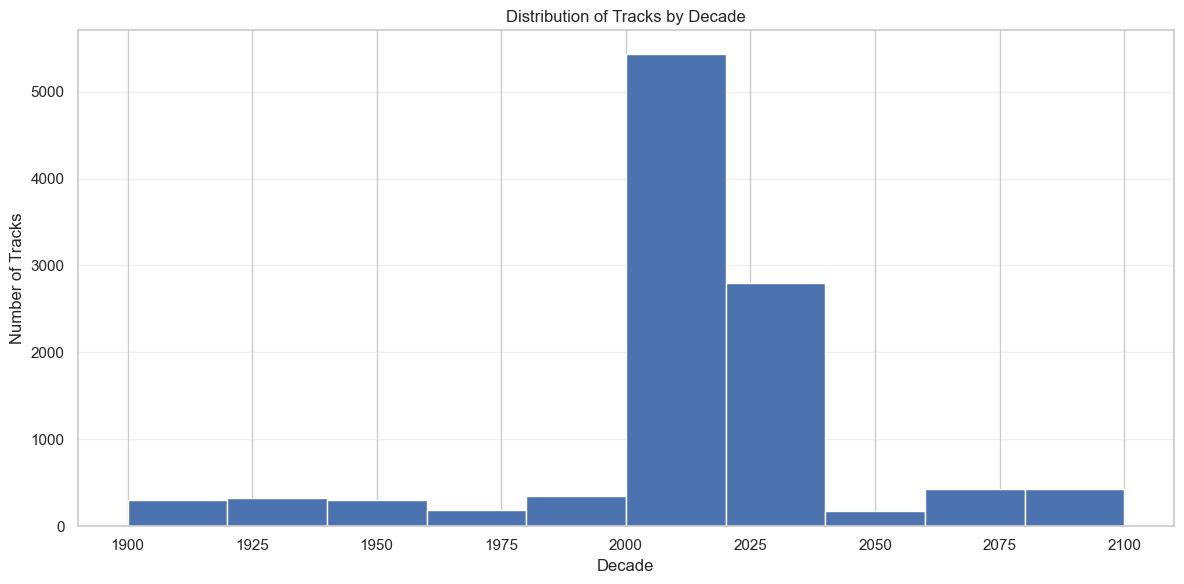

In [44]:
# Year tracks distribution
# Use errors='coerce' so unparsable year values become NaN instead of raising an error
tracks['year'] = pd.to_numeric(tracks['year'], errors='coerce')

# Drop rows where year couldn't be parsed
tracks = tracks.dropna(subset=['year'])

# Convert to integer year now that NaNs are removed
tracks['year'] = tracks['year'].astype(int)

# Compute decade and plot
tracks['decade'] = (tracks['year'] // 10) * 10
plot_histogram(tracks, 'decade', 'Decade', 'Number of Tracks',
               'Distribution of Tracks by Decade', nbins=10)

plt.show()

Normalize and bucket release years into decades, then plot the distribution to reduce clutter on the x-axis and visualize trends by decade.

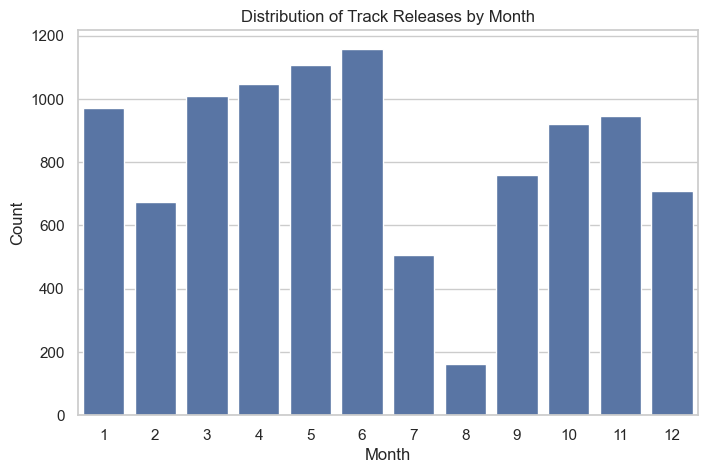

In [46]:
# Month tracks distribution
if 'month' in tracks.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        x=tracks['month'].dropna().astype(int),
        order=sorted(tracks['month'].dropna().astype(int).unique())
    )
    plt.title('Distribution of Track Releases by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.show()

Plot track release counts per month to check seasonal patterns in releases.

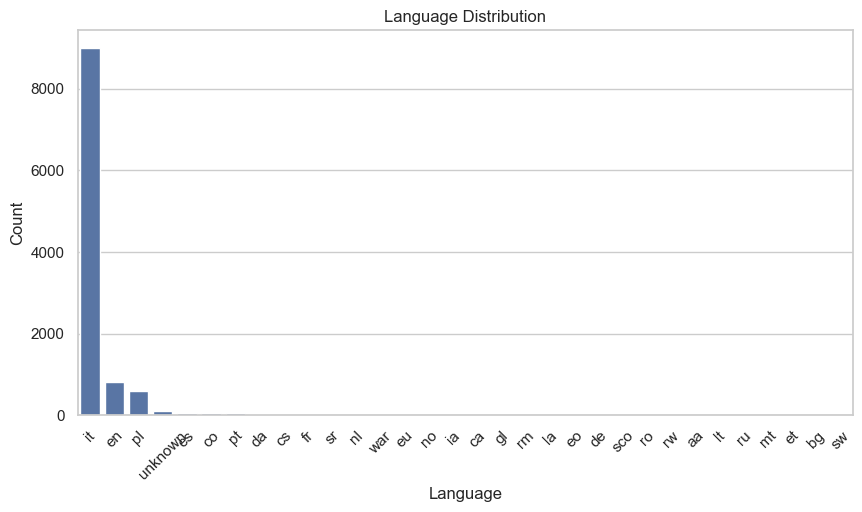

In [50]:
# Language distribution
if 'language' in tracks.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(
        x=tracks['language'].fillna('unknown'),
        order=tracks['language'].fillna('unknown').value_counts().index
    )
    plt.title('Language Distribution')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Plot language counts for tracks to see which languages are most common and how many tracks are in each language.

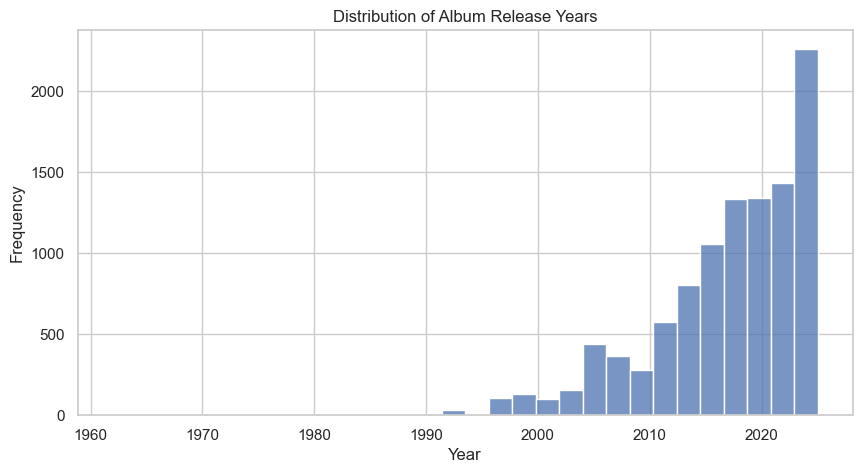

In [48]:
# --- Album release date distribution ---
if 'album_release_date' in tracks.columns:
    album_years = pd.to_datetime(tracks['album_release_date'], errors='coerce').dt.year
    plt.figure(figsize=(10, 5))
    sns.histplot(album_years.dropna(), bins=30)
    plt.title('Distribution of Album Release Years')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

Plot distribution of album release years (converted to year) to understand when albums were released across the dataset.

## Musical Features Analysis

This section analyzes the musical characteristics of the tracks:
1. **Acoustic Features**:
   - Duration
   - Loudness
   - Tempo
   - Time signature
2. **Audio Properties**:
   - Acousticness
   - Danceability
   - Energy
   - Instrumentalness
3. **Musical Elements**:
   - Key distribution
   - Mode (major/minor)
   - Time signature patterns

The visualizations help understand:
- The distribution of each feature
- Relationships between different musical aspects
- Common patterns in contemporary music production
- Technical characteristics of popular tracks

Found musical columns: ['bpm', 'loudness', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch']


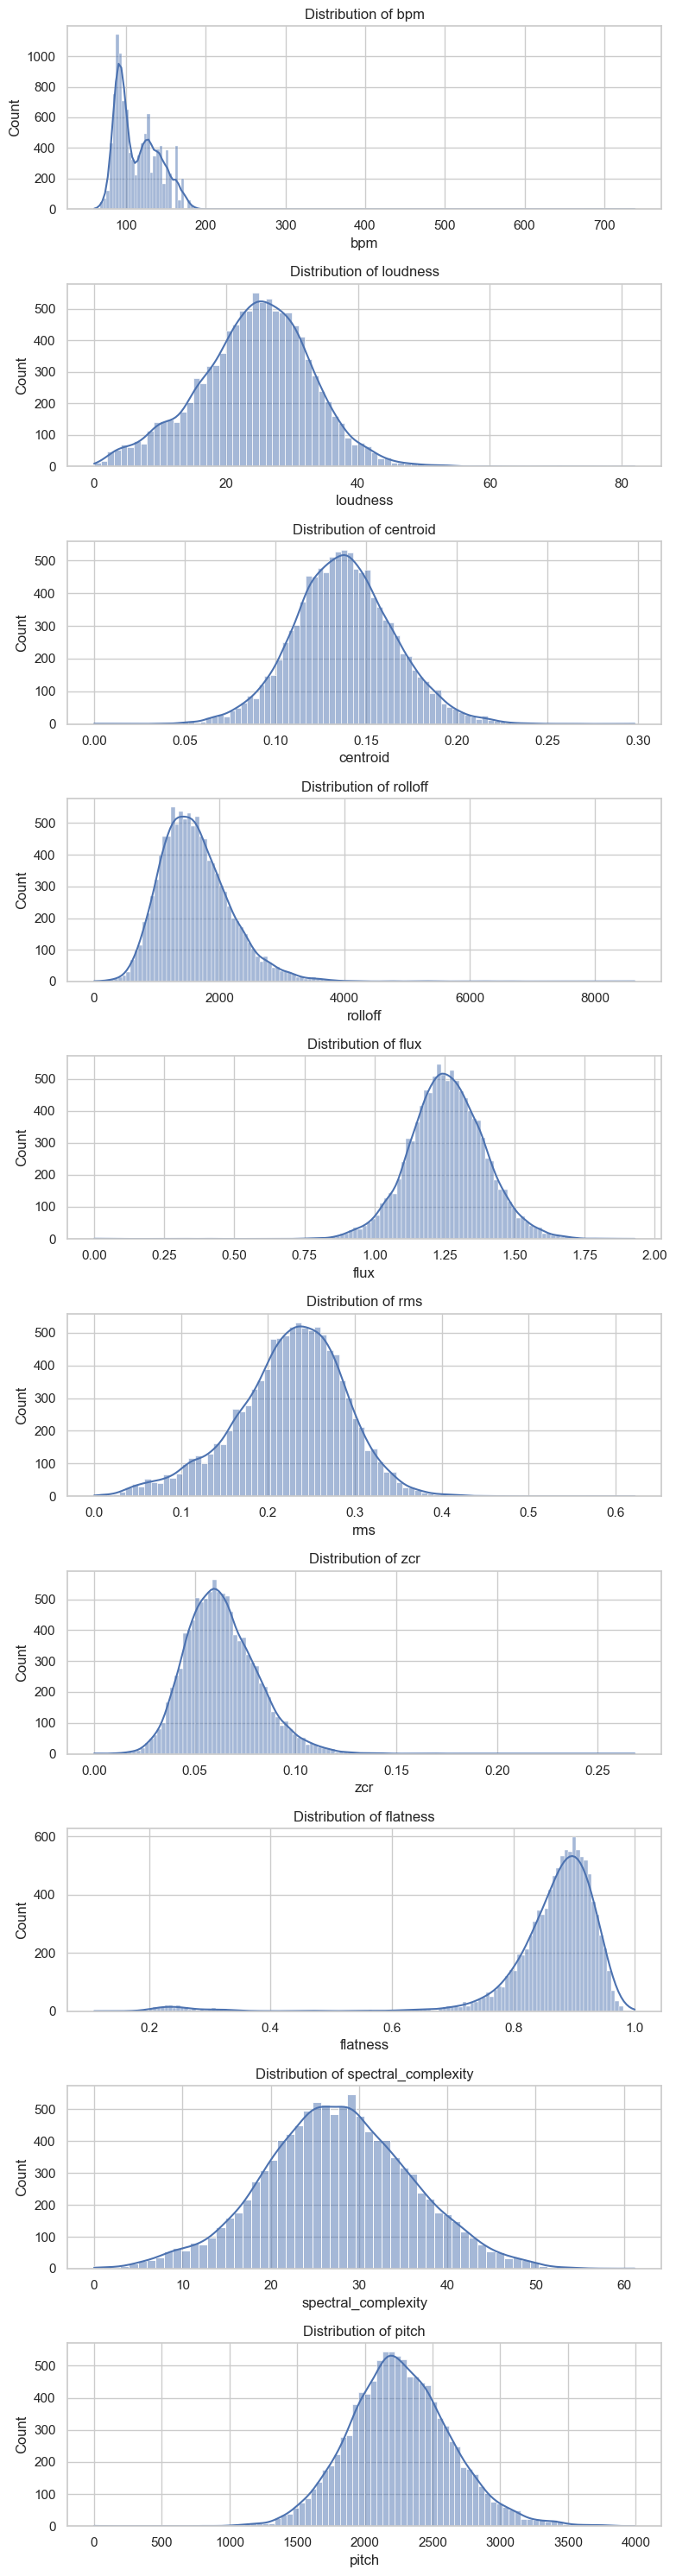

In [51]:
# Quick overview of musical features distributions
musical_cols = [c for c in ['bpm','loudness','centroid','rolloff','flux','rms','zcr','flatness','spectral_complexity','pitch'] if c in tracks.columns]
print('Found musical columns:', musical_cols)
if musical_cols:
    fig, axs = plt.subplots(len(musical_cols), 1, figsize=(8, 3*len(musical_cols)))
    for i,c in enumerate(musical_cols):
        ax = axs[i] if len(musical_cols)>1 else axs
        sns.histplot(tracks[c].dropna(), kde=True, ax=ax)
        ax.set_title(f'Distribution of {c}')
    plt.tight_layout()

    plt.show()

Quickly visualize distributions for available musical features (bpm, loudness, centroid, etc.) to inspect their shapes and identify outliers.

## Bad Words Analysis

This section analyzes the distribution of bad words in both Italian and English:
1. **Overall Distribution**:
   - Count of bad words per language
   - Most common bad words
2. **Comparative Analysis**:
   - Distribution between Italian and English bad words
   - Tracks with most bad words

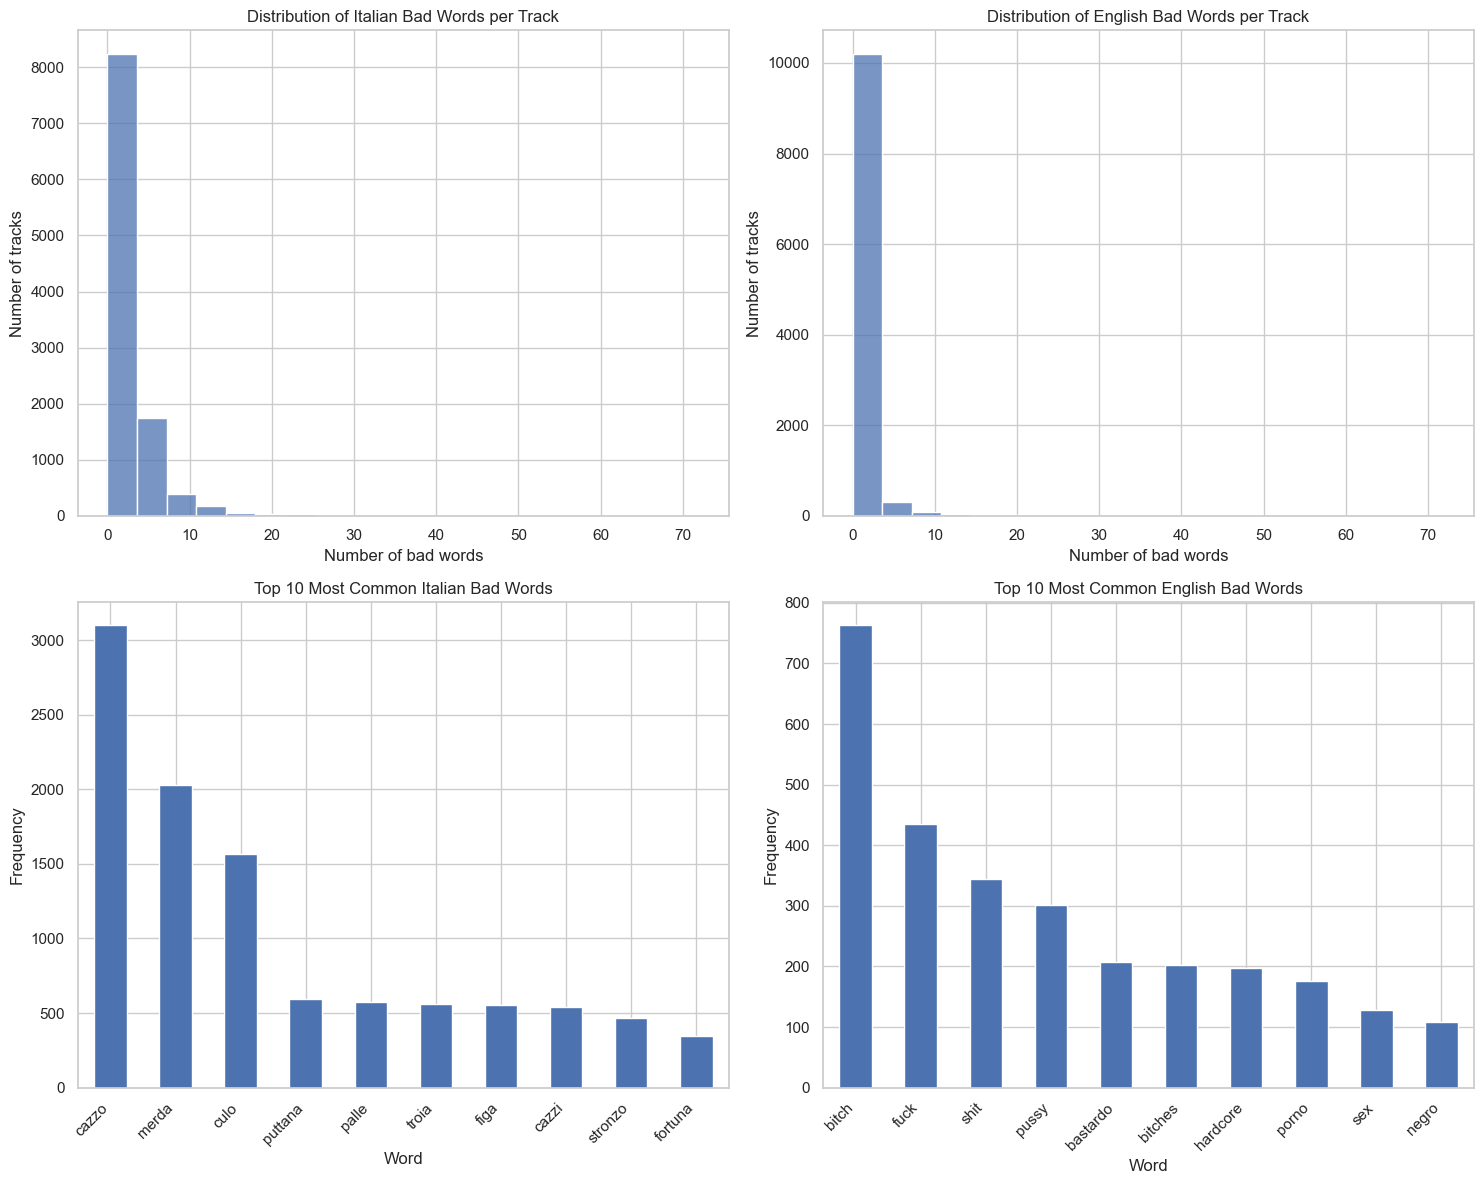


Summary Statistics:
Total number of tracks with Italian bad words: 6830
Total number of tracks with English bad words: 2673
Total unique Italian bad words: 171
Total unique English bad words: 94

Most common Italian bad words:
cazzo      3099
merda      2026
culo       1563
puttana     591
palle       577

Most common English bad words:
bitch       763
fuck        435
shit        345
pussy       301
bastardo    207


In [53]:
# Function to extract words from string representation of list
def extract_words(word_list_str):
    if pd.isna(word_list_str):
        return []
    try:
        return ast.literal_eval(word_list_str)
    except:
        return []

# Convert swear counts to numeric
tracks['swear_IT'] = pd.to_numeric(tracks['swear_IT'], errors='coerce').fillna(0)
tracks['swear_EN'] = pd.to_numeric(tracks['swear_EN'], errors='coerce').fillna(0)

# Extract Italian and English bad words
tracks['swear_IT_list'] = tracks['swear_IT_words'].apply(extract_words)
tracks['swear_EN_list'] = tracks['swear_EN_words'].apply(extract_words)

# Count occurrences of each bad word
it_words = [word for words in tracks['swear_IT_list'] for word in words]
en_words = [word for words in tracks['swear_EN_list'] for word in words]

it_word_counts = pd.Series(it_words).value_counts()
en_word_counts = pd.Series(en_words).value_counts()

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Distribution of number of bad words per track (Italian)
sns.histplot(tracks['swear_IT'], ax=ax1, bins=20)
ax1.set_title('Distribution of Italian Bad Words per Track')
ax1.set_xlabel('Number of bad words')
ax1.set_ylabel('Number of tracks')

# Plot 2: Distribution of number of bad words per track (English)
sns.histplot(tracks['swear_EN'], ax=ax2, bins=20)
ax2.set_title('Distribution of English Bad Words per Track')
ax2.set_xlabel('Number of bad words')
ax2.set_ylabel('Number of tracks')

# Plot 3: Top 10 most common Italian bad words
if len(it_word_counts) > 0:
    it_word_counts.head(10).plot(kind='bar', ax=ax3)
    ax3.set_title('Top 10 Most Common Italian Bad Words')
    ax3.set_xlabel('Word')
    ax3.set_ylabel('Frequency')
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 4: Top 10 most common English bad words
if len(en_word_counts) > 0:
    en_word_counts.head(10).plot(kind='bar', ax=ax4)
    ax4.set_title('Top 10 Most Common English Bad Words')
    ax4.set_xlabel('Word')
    ax4.set_ylabel('Frequency')
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of tracks with Italian bad words: {(tracks['swear_IT'] > 0).sum()}")
print(f"Total number of tracks with English bad words: {(tracks['swear_EN'] > 0).sum()}")
print(f"Total unique Italian bad words: {len(it_word_counts)}")
print(f"Total unique English bad words: {len(en_word_counts)}")
print("\nMost common Italian bad words:")
print(it_word_counts.head().to_string())
print("\nMost common English bad words:")
print(en_word_counts.head().to_string())

Extract swear word lists, convert counts to numeric, and prepare series of Italian and English swear words for frequency analysis and plotting.

In [55]:
# Create detailed analysis of bad words occurrences
def print_word_statistics(word_counts, total_tracks, language):
    print(f"\n{'-'*50}")
    print(f"Complete list of {language} bad words:")
    print(f"{'-'*50}")
    print(f"{'Word':<20} {'Occurrences':<15} {'% of Tracks':<15}")
    print(f"{'-'*50}")
    
    for word, count in word_counts.items():
        percentage = (count / total_tracks) * 100
        print(f"{word:<20} {count:<15} {percentage:.2f}%")

# Calculate total number of tracks
total_tracks = len(tracks)

# Print statistics for Italian bad words
print_word_statistics(it_word_counts, total_tracks, "Italian")

# Print statistics for English bad words
print_word_statistics(en_word_counts, total_tracks, "English")

# Additional summary statistics
print(f"\n{'-'*50}")
print("Summary:")
print(f"{'-'*50}")
print(f"Total tracks analyzed: {total_tracks}")
print(f"Total unique Italian bad words: {len(it_word_counts)}")
print(f"Total unique English bad words: {len(en_word_counts)}")
print(f"Total Italian bad word occurrences: {sum(it_word_counts)}")
print(f"Total English bad word occurrences: {sum(en_word_counts)}")
print(f"Average Italian bad words per track: {sum(it_word_counts)/total_tracks:.2f}")
print(f"Average English bad words per track: {sum(en_word_counts)/total_tracks:.2f}")


--------------------------------------------------
Complete list of Italian bad words:
--------------------------------------------------
Word                 Occurrences     % of Tracks    
--------------------------------------------------
cazzo                3099            28.89%
merda                2026            18.89%
culo                 1563            14.57%
puttana              591             5.51%
palle                577             5.38%
troia                558             5.20%
figa                 556             5.18%
cazzi                543             5.06%
stronzo              464             4.33%
fortuna              344             3.21%
fottuto              339             3.16%
cesso                288             2.68%
coglioni             269             2.51%
stupido              246             2.29%
fottere              243             2.27%
coglione             231             2.15%
bastardo             207             1.93%
bastardi             20

Print detailed statistics and percentages for Italian and English bad words and display summary metrics.

# Enrichment of the dataset and fix of data using Spotify API


In [76]:
tracks_enriched = pd.read_csv("../enriched_datasets/tracks_enriched.csv", sep=',')
artists_enriched = pd.read_csv("../enriched_datasets/artists.csv", sep=',')

Load enriched datasets generated via API enrichment (`tracks_enriched`, `artists_enriched`) for post-processing and verification.

In [77]:
artists_enriched.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,source
0,ART82291002,99 posse,NaN,NaN,Napoli,Italiana,Gruppo musicale hip hop italiano,1991-01-01,NaN,NaN,Campania,Italia,40.8518,14.2681,it.wikipedia.org/wiki/99_Posse
1,ART18853907,alfa,M,2000-08-19,Genova,Italiana,Cantautore e rapper italiano,2018-01-01,NaN,GE,Liguria,Italia,44.4056,8.9463,it.wikipedia.org/wiki/Alfa_(cantante)
2,ART64265460,anna pepe,F,2003-08-15,La Spezia,Italiana,Rapper italiana,2020-01-01,NaN,SP,Liguria,Italia,44.1024,9.8241,it.wikipedia.org/wiki/Anna_(rapper)
3,ART75741740,articolo 31,NaN,NaN,Milano,Italiana,Gruppo musicale hip hop italiano,1990-01-01,NaN,MI,Lombardia,Italia,45.4642,9.1900,it.wikipedia.org/wiki/Articolo_31
4,ART19605256,beba,F,1994-10-16,Torino,Italiana,Rapper italiana,2017-01-01,NaN,TO,Piemonte,Italia,45.0703,7.6869,it.wikipedia.org/wiki/Beba_(rapper)


Preview the first rows of the enriched `artists` dataset to confirm enrichment results and schema.

In [80]:
tracks_enriched.head()

,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False
3,TR480968,ART04205421,Rosa Chemical,CEO by Rosa Chemical (Ft. Taxi B),CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,39890.0,...,single,1.0,2.0,169000.0,True,47.0,https://i.scdn.co/image/ab67616d0000b27367c03d...,ALB730959,Designer sui vestiti penso di essere un outlet...,False
4,TR585039,ART04205421,Rosa Chemical,LONDRA by Rosa Chemical (Ft. Rkomi),LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,35432.0,...,album,1.0,8.0,194779.0,True,41.0,https://i.scdn.co/image/ab67616d0000b273fcdb60...,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",False


Preview the first rows of the enriched `tracks` dataset to confirm enrichment results and schema.

In [81]:
artists_enriched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        97 non-null     object 
 3   birth_date    88 non-null     object 
 4   birth_place   98 non-null     object 
 5   nationality   103 non-null    object 
 6   description   104 non-null    object 
 7   active_start  65 non-null     object 
 8   active_end    0 non-null      float64
 9   province      93 non-null     object 
 10  region        93 non-null     object 
 11  country       102 non-null    object 
 12  latitude      98 non-null     float64
 13  longitude     98 non-null     float64
 14  source        31 non-null     object 
dtypes: float64(3), object(12)
memory usage: 12.3+ KB


Show `artists_enriched.info()` to inspect dtypes and non-null counts after enrichment.

In [78]:
tracks_enriched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10951 non-null  object 
 15  month              

Show `tracks_enriched.info()` to inspect dtypes and non-null counts after enrichment.

,NaN Values %,NaN Values,Non-NaN Values %
active_end,100.000000,104,0.000000
source,70.192308,73,29.807692
active_start,37.500000,39,62.500000
birth_date,15.384615,16,84.615385
province,10.576923,11,89.423077
region,10.576923,11,89.423077
gender,6.730769,7,93.269231
birth_place,5.769231,6,94.230769
latitude,5.769231,6,94.230769
longitude,5.769231,6,94.230769


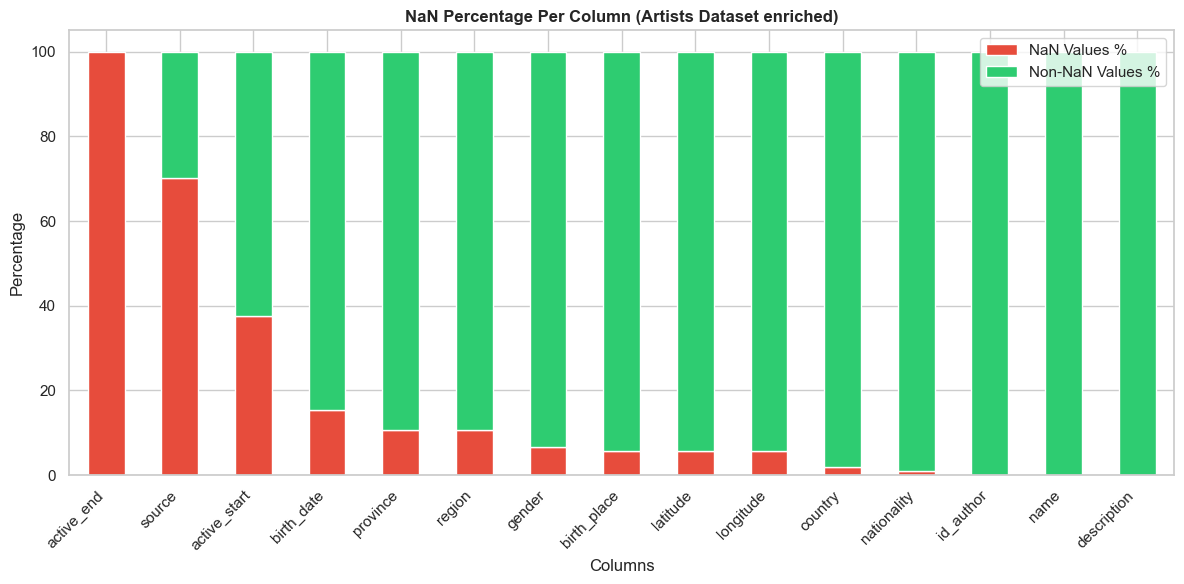

In [ ]:
## Artists after enrichment
# Check how many NaNs are present and plot the number of NaN per each column
# from the distribution we can see that no active end date is present, and about half active start
plot_nans_stacked(artists_enriched, 'NaN Percentage Per Column (Artists Dataset enriched)')

,NaN Values %,NaN Values,Non-NaN Values %
featured_artists,68.502597,7649,31.497403
stats_pageviews,58.427369,6524,41.572631
album,13.559018,1514,86.440982
day,7.469103,834,92.530897
month,7.164607,800,92.835393
year,1.925488,215,98.074512
language,0.940355,105,99.059645
duration_ms,0.698549,78,99.301451
album_release_date,0.698549,78,99.301451
disc_number,0.698549,78,99.301451


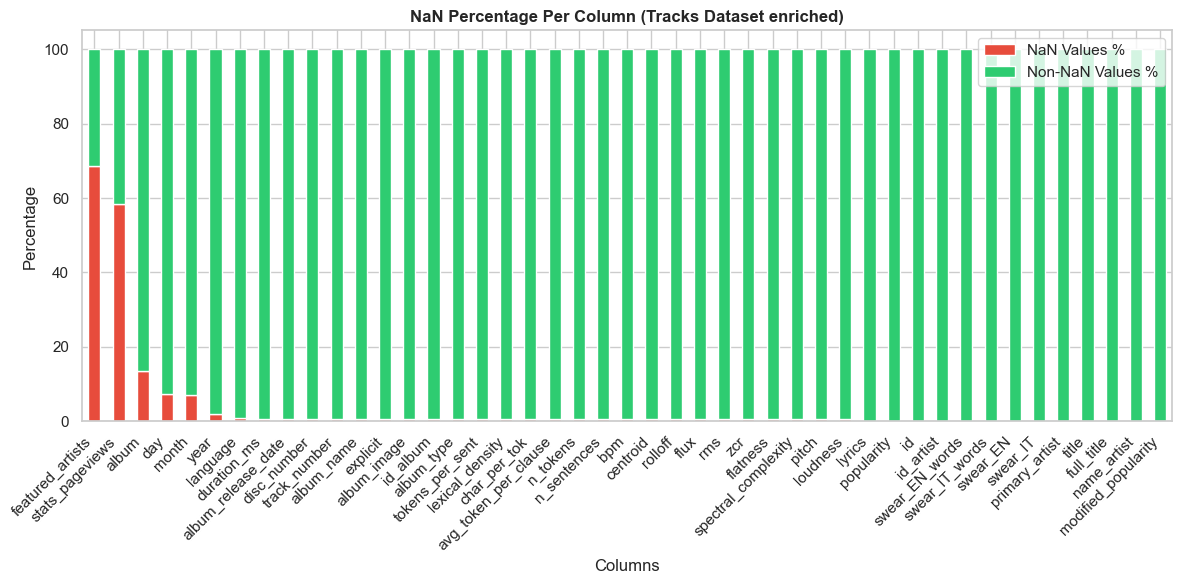

In [ ]:
## Tracks after enrichment
# Check how many NaNs are present and plot the number of NaN per each column
plot_nans_stacked(tracks_enriched, 'NaN Percentage Per Column (Tracks Dataset enriched)')

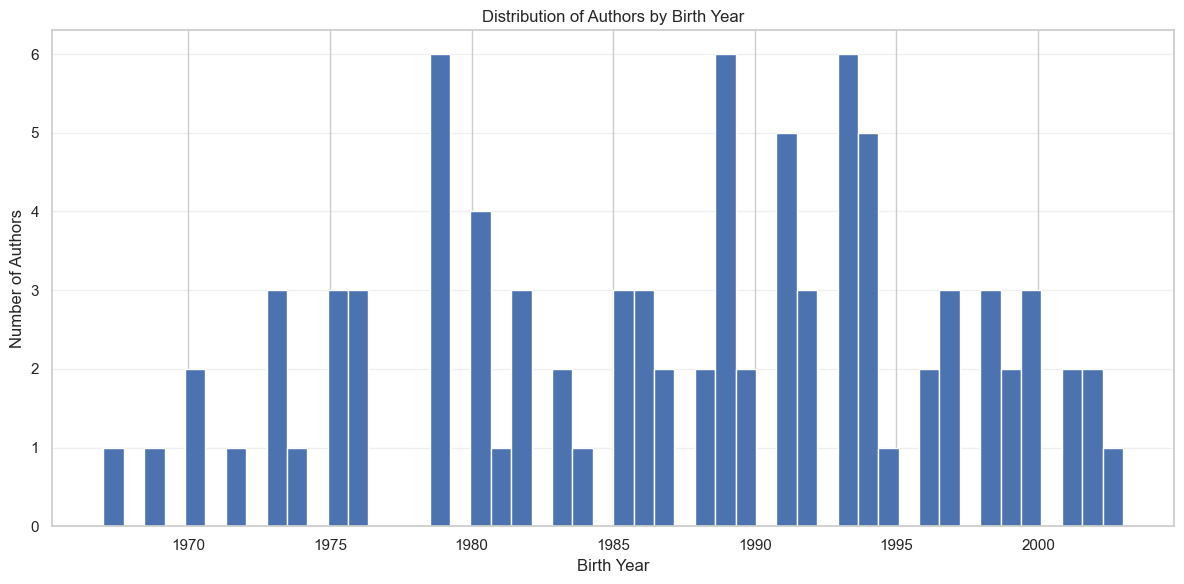

In [ ]:
# birth year distribution after enrichment
artists_enriched['birth_year'] = pd.to_datetime(artists_enriched['birth_date'], errors='coerce').dt.year
plot_histogram(artists_enriched, 'birth_year', 'Birth Year', 'Number of Authors', 'Distribution of Authors by Birth Year', nbins=50)

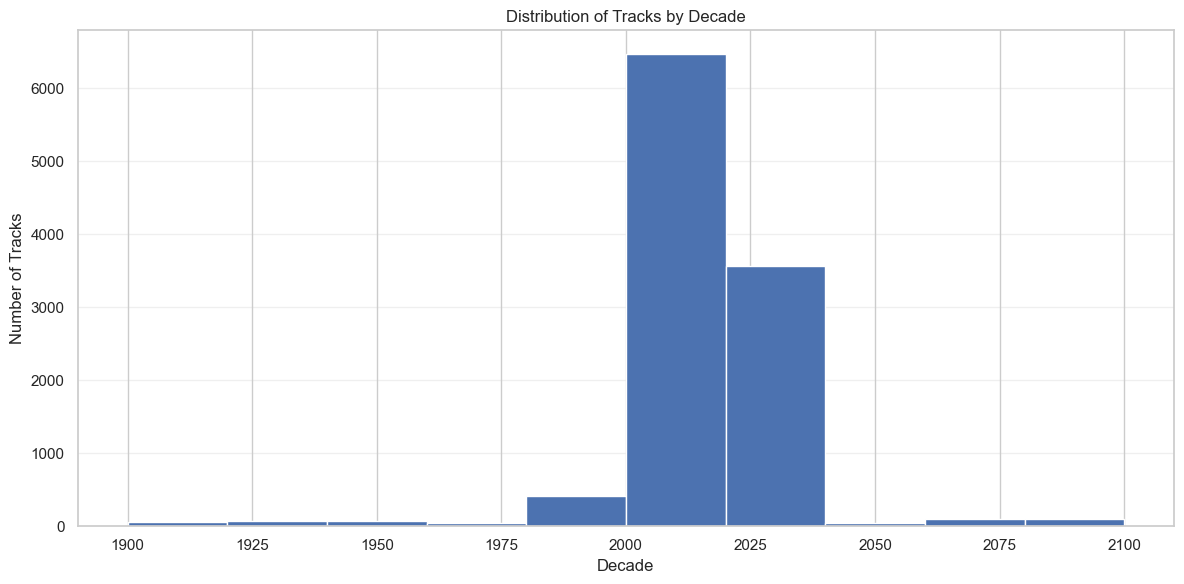

In [ ]:
# Year tracks distribution after enrichment
tracks_enriched['year'] = pd.to_numeric(tracks_enriched['year'], errors='coerce')

# Drop rows where year couldn't be parsed
tracks_enriched = tracks_enriched.dropna(subset=['year'])

# Convert to integer year now that NaNs are removed
tracks_enriched['year'] = tracks_enriched['year'].astype(int)

# Compute decade and plot
tracks_enriched['decade'] = (tracks_enriched['year'] // 10) * 10
plot_histogram(tracks_enriched, 'decade', 'Decade', 'Number of Tracks',
               'Distribution of Tracks by Decade', nbins=10)

plt.show()

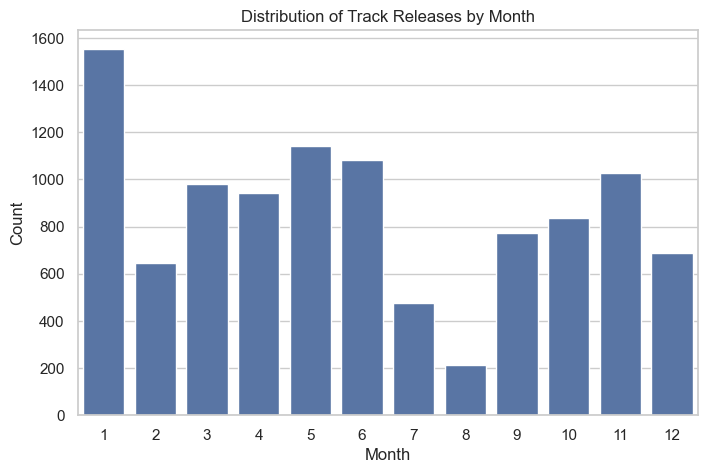

In [ ]:
# Month tracks distribution after enrichment
if 'month' in tracks_enriched.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        x=tracks_enriched['month'].dropna().astype(int),
        order=sorted(tracks_enriched['month'].dropna().astype(int).unique())
    )
    plt.title('Distribution of Track Releases by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.show()